In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_filtered.csv")

/Users/ridhimasaxena/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,3,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(518158, 18)

In [4]:
data.describe()

,Unnamed: 0,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long
count,518158.000000,518158.000000,479079.000000,518158.000000,518158.000000,518158.000000,488947.000000,488947.000000
mean,259079.500000,2332.967307,385.207181,2017.557511,6.647885,13.078422,42.239550,-70.950193
std,149579.474728,1182.585591,241.033280,1.550265,3.313055,6.348057,1.885772,3.050510
min,1.000000,111.000000,0.000000,2015.000000,1.000000,0.000000,-1.000000,-71.203312
25%,129540.250000,1102.000000,179.000000,2016.000000,4.000000,9.000000,42.296852,-71.097465
50%,259079.500000,3005.000000,347.000000,2018.000000,7.000000,14.000000,42.325029,-71.077734
75%,388618.750000,3201.000000,541.000000,2019.000000,9.000000,18.000000,42.348294,-71.062562
max,518158.000000,3831.000000,962.000000,2020.000000,12.000000,23.000000,42.395042,0.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [6]:
data.nunique()

Unnamed: 0             518158
INCIDENT_NUMBER        466907
OFFENSE_CODE              234
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       280
DISTRICT                   13
REPORTING_AREA            879
SHOOTING                    4
OCCURRED_ON_DATE       380677
YEAR                        6
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   5379
Lat                     31184
Long                    31031
Location                31973
dtype: int64

In [7]:
data['SHOOTING'].unique()

array(['0', nan, 'Y', 0.0, 1.0], dtype=object)

In [10]:
data['SHOOTING'].replace('0','N', inplace =True)


In [13]:
data['SHOOTING'].unique()


array(['N', nan, 'Y', 0.0, 1.0], dtype=object)

In [15]:
data['SHOOTING'].replace(0.0,'N', inplace =True)

In [16]:
data['SHOOTING'].unique()

array(['N', nan, 'Y', 1.0], dtype=object)

In [17]:
data['SHOOTING'].replace(1.0,'Y', inplace =True)

In [19]:
data['SHOOTING'].replace(np.nan,'UNK', inplace =True)

In [20]:
data['SHOOTING'].unique()

array(['N', 'UNK', 'Y'], dtype=object)

In [21]:
#Cleaning the data
data.isnull().sum()

Unnamed: 0                 0
INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     91319
OFFENSE_DESCRIPTION        0
DISTRICT                2449
REPORTING_AREA         39079
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               91429
STREET                 20561
Lat                    29211
Long                   29211
Location                   0
dtype: int64

In [22]:
##Drop unnecessary columns

crime = data.drop(['OFFENSE_CODE_GROUP', 'REPORTING_AREA','UCR_PART'], axis =1)

In [25]:
crime.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,1,TESTTEST2,423,ASSAULT - AGGRAVATED,External,N,10/16/19 0:00,2019,10,Wednesday,0,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,2,S97333701,3301,VERBAL DISPUTE,C6,N,7/18/20 14:34,2020,7,Saturday,14,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,3,S47513131,2647,THREATS TO DO BODILY HARM,E18,N,6/24/20 10:15,2020,6,Wednesday,10,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,4,I92102201,3301,VERBAL DISPUTE,E13,N,12/20/19 3:08,2019,12,Friday,3,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,5,I92097173,3115,INVESTIGATE PERSON,C11,N,10/23/19 0:00,2019,10,Wednesday,0,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [28]:
crime.shape

(518158, 15)

In [29]:
data.describe()

,Unnamed: 0,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long
count,518158.000000,518158.000000,479079.000000,518158.000000,518158.000000,518158.000000,488947.000000,488947.000000
mean,259079.500000,2332.967307,385.207181,2017.557511,6.647885,13.078422,42.239550,-70.950193
std,149579.474728,1182.585591,241.033280,1.550265,3.313055,6.348057,1.885772,3.050510
min,1.000000,111.000000,0.000000,2015.000000,1.000000,0.000000,-1.000000,-71.203312
25%,129540.250000,1102.000000,179.000000,2016.000000,4.000000,9.000000,42.296852,-71.097465
50%,259079.500000,3005.000000,347.000000,2018.000000,7.000000,14.000000,42.325029,-71.077734
75%,388618.750000,3201.000000,541.000000,2019.000000,9.000000,18.000000,42.348294,-71.062562
max,518158.000000,3831.000000,962.000000,2020.000000,12.000000,23.000000,42.395042,0.000000


In [30]:
data.columns

Index(['Unnamed: 0', 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [31]:
crime.columns

Index(['Unnamed: 0', 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION',
       'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [32]:
data.shape

(518158, 18)

In [33]:
crime.dropna(subset=['Lat'])

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,2,S97333701,3301,VERBAL DISPUTE,C6,N,7/18/20 14:34,2020,7,Saturday,14,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,3,S47513131,2647,THREATS TO DO BODILY HARM,E18,N,6/24/20 10:15,2020,6,Wednesday,10,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,4,I92102201,3301,VERBAL DISPUTE,E13,N,12/20/19 3:08,2019,12,Friday,3,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,5,I92097173,3115,INVESTIGATE PERSON,C11,N,10/23/19 0:00,2019,10,Wednesday,0,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
5,6,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,N,11/22/19 7:50,2019,11,Friday,7,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518153,518154,20062356,1107,FRAUD - IMPERSONATION,E18,N,8/28/20 18:39,2020,8,Friday,18,HYDE PARK AVE,42.256215,-71.124019,"(42.25621500, -71.12401900)"
518154,518155,20054040,3501,MISSING PERSON,C11,N,7/30/20 15:30,2020,7,Thursday,15,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
518155,518156,20046400,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,N,7/2/20 1:38,2020,7,Thursday,1,PASADENA RD,42.305760,-71.083771,"(42.30576000, -71.08377100)"
518156,518157,20038446,1501,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,N,6/3/20 1:15,2020,6,Wednesday,1,WASHINGTON ST,42.323807,-71.089150,"(42.32380700, -71.08915000)"


In [34]:
crime.shape

(518158, 15)

In [35]:
crime_new = crime.dropna(subset=['Lat'])

In [36]:
crime_new.shape

(488947, 15)

In [37]:
crime_new.nunique()

Unnamed: 0             488947
INCIDENT_NUMBER        441663
OFFENSE_CODE              231
OFFENSE_DESCRIPTION       275
DISTRICT                   13
SHOOTING                    3
OCCURRED_ON_DATE       361869
YEAR                        6
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
STREET                   4352
Lat                     31184
Long                    31031
Location                31973
dtype: int64

In [38]:
crime_new.isnull().sum()

Unnamed: 0                 0
INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
DISTRICT                1925
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                 10558
Lat                        0
Long                       0
Location                   0
dtype: int64

In [39]:
#Relationship Analysis

In [40]:
correlation = crime_new.corr()

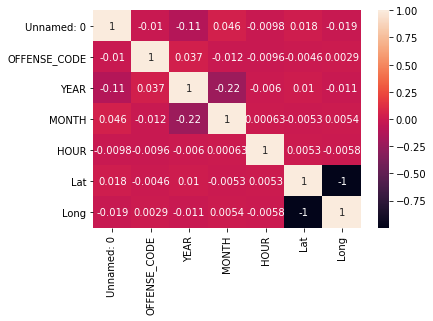

In [41]:
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns
           ,annot=True)

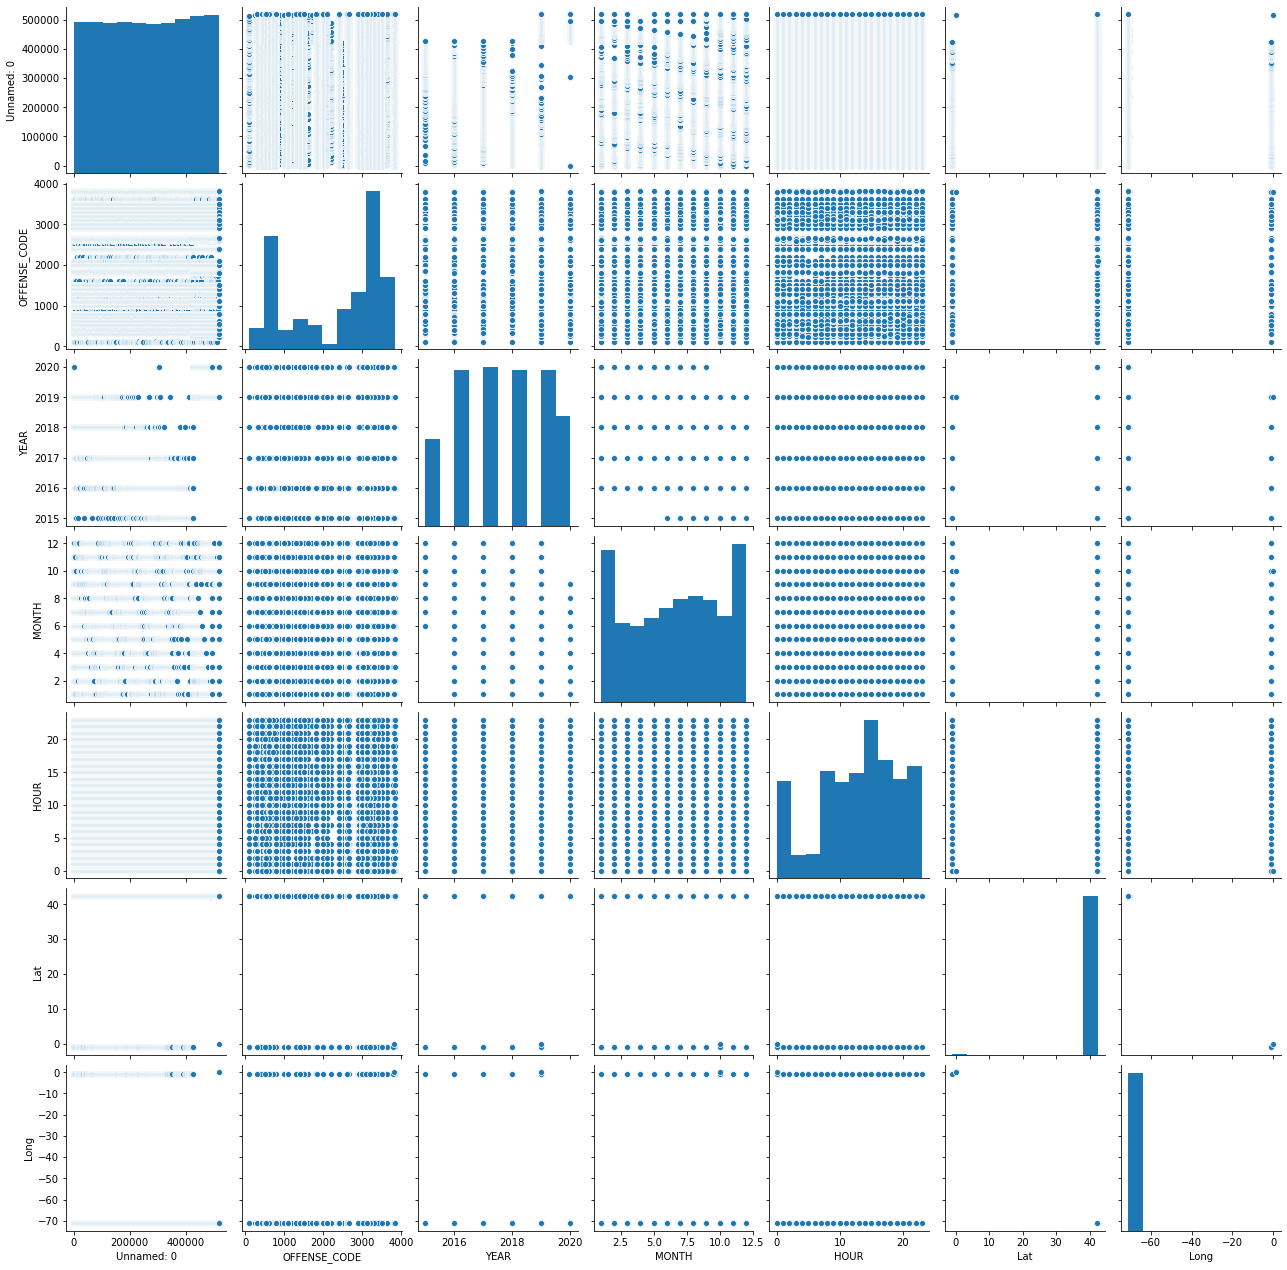

In [42]:
sns.pairplot(crime_new)

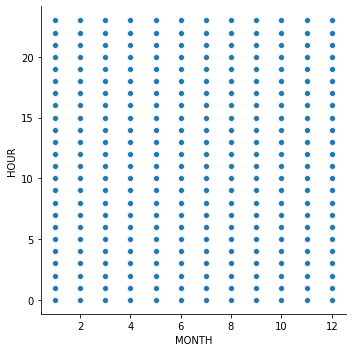

In [45]:
sns.relplot(x='MONTH', y = 'HOUR', data = crime_new)

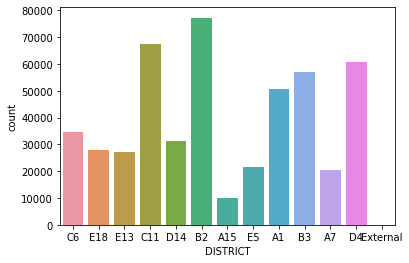

In [46]:
sns.countplot(crime_new['DISTRICT']);

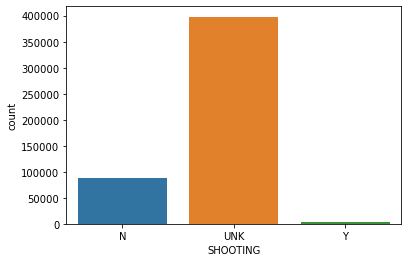

In [47]:
sns.countplot(crime_new['SHOOTING']);

KeyError: 'OFFENSE DESCRIPTION'

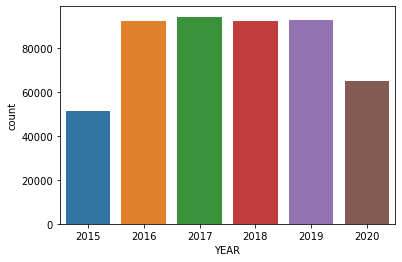

In [50]:
sns.countplot(crime_new['YEAR']);

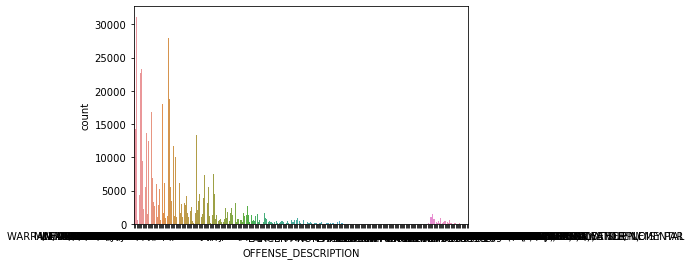

In [52]:
sns.countplot(crime_new['OFFENSE_DESCRIPTION']);

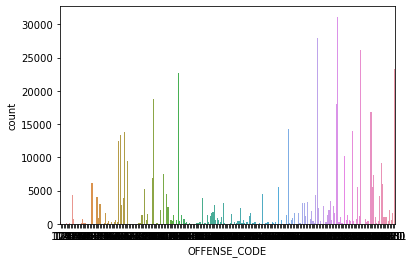

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

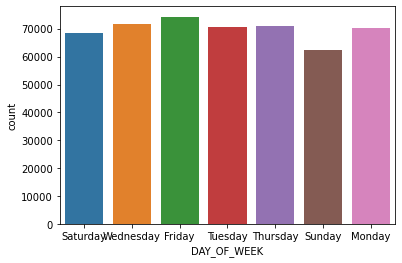

In [54]:

sns.countplot(crime_new['DAY_OF_WEEK']);

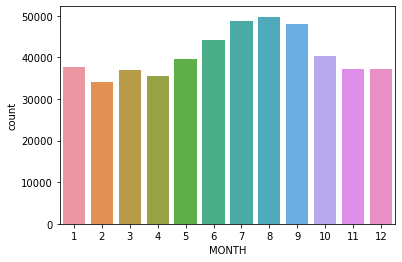

In [55]:
sns.countplot(crime_new['MONTH']);

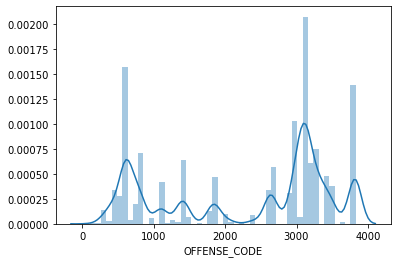

In [56]:
sns.distplot(crime_new['OFFENSE_CODE'])

In [57]:
import scipy.stats

In [58]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [59]:
import re
import mailbox
import csv

In [60]:
crime_new.info

<bound method DataFrame.info of         Unnamed: 0 INCIDENT_NUMBER  OFFENSE_CODE  \
1                2       S97333701          3301   
2                3       S47513131          2647   
3                4       I92102201          3301   
4                5       I92097173          3115   
5                6       I92094519          3126   
...            ...             ...           ...   
518153      518154        20062356          1107   
518154      518155        20054040          3501   
518155      518156        20046400          1501   
518156      518157        20038446          1501   
518157      518158        20030892           540   

                                      OFFENSE_DESCRIPTION DISTRICT SHOOTING  \
1                                          VERBAL DISPUTE       C6        N   
2                               THREATS TO DO BODILY HARM      E18        N   
3                                          VERBAL DISPUTE      E13        N   
4                          

In [62]:
pd.DataFrame(crime_new.DISTRICT.value_counts())

,DISTRICT
B2,77261
C11,67560
D4,60888
B3,56955
A1,50800
C6,34711
D14,31429
E18,28039
E13,27301
E5,21542


In [63]:
pd.DataFrame(crime_new.OFFENSE_DESCRIPTION.value_counts())

,OFFENSE_DESCRIPTION
INVESTIGATE PERSON,31142
SICK/INJURED/MEDICAL - PERSON,27936
VERBAL DISPUTE,26116
M/V - LEAVING SCENE - PROPERTY DAMAGE,23332
VANDALISM,22650
...,...
AUTO THEFT LEASE/RENT VEHICLE,1
B&E RESIDENCE DAY - NO FORCE,1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON,1
B&E NON-RESIDENCE NIGHT - FORCE,1


In [64]:
pd.DataFrame(crime_new.SHOOTING.value_counts())

,SHOOTING
UNK,397950
N,88247
Y,2750


In [67]:
pd.DataFrame(crime_new.YEAR.value_counts(normalize = True))

,YEAR
2017,0.192882
2019,0.190184
2016,0.189153
2018,0.189098
2020,0.133417
2015,0.105265


In [66]:
pd.DataFrame(crime_new.HOUR.value_counts())

,HOUR
17,31083
16,30365
18,30304
12,28885
19,26744
14,26322
13,25849
0,25435
15,25401
11,25167


In [71]:
#can use group by to break down even further such as seeing which district has experienced increase in crime every year

byyear = crime_new.groupby("YEAR").DISTRICT.value_counts()
byyear

YEAR  DISTRICT
2015  B2          8266
      C11         7073
      D4          6965
      A1          5801
      B3          5450
                  ... 
2020  E13         3743
      E5          3224
      A7          3017
      A15         1258
      External      23
Name: DISTRICT, Length: 74, dtype: int64

In [73]:
byyear.index

MultiIndex([(2015,       'B2'),
            (2015,      'C11'),
            (2015,       'D4'),
            (2015,       'A1'),
            (2015,       'B3'),
            (2015,       'C6'),
            (2015,      'D14'),
            (2015,      'E13'),
            (2015,      'E18'),
            (2015,       'A7'),
            (2015,       'E5'),
            (2015,      'A15'),
            (2016,       'B2'),
            (2016,      'C11'),
            (2016,       'D4'),
            (2016,       'B3'),
            (2016,       'A1'),
            (2016,       'C6'),
            (2016,      'D14'),
            (2016,      'E13'),
            (2016,      'E18'),
            (2016,       'E5'),
            (2016,       'A7'),
            (2016,      'A15'),
            (2017,       'B2'),
            (2017,      'C11'),
            (2017,       'D4'),
            (2017,       'B3'),
            (2017,       'A1'),
            (2017,       'C6'),
            (2017,      'D14'),
        

In [74]:
byyear.unstack

<bound method Series.unstack of YEAR  DISTRICT
2015  B2          8266
      C11         7073
      D4          6965
      A1          5801
      B3          5450
                  ... 
2020  E13         3743
      E5          3224
      A7          3017
      A15         1258
      External      23
Name: DISTRICT, Length: 74, dtype: int64>

In [78]:
crime_new.to_csv(r'/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_cleanest.csv')

In [120]:
byseason = crime_new.groupby("SEASON").SEASON.value_counts()

In [127]:
crime_new.head()


,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,SEASON,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,2,S97333701,3301,VERBAL DISPUTE,C6,N,7/18/20 14:34,2020,Winter,Saturday,14,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,3,S47513131,2647,THREATS TO DO BODILY HARM,E18,N,6/24/20 10:15,2020,Spring,Wednesday,10,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,4,I92102201,3301,VERBAL DISPUTE,E13,N,12/20/19 3:08,2019,Fall,Friday,3,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,5,I92097173,3115,INVESTIGATE PERSON,C11,N,10/23/19 0:00,2019,Fall,Wednesday,0,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
5,6,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,N,11/22/19 7:50,2019,Fall,Friday,7,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


In [121]:
byseason

SEASON  SEASON
1       1         157144
2       2         119289
3       3          97735
4       4         114779
Name: SEASON, dtype: int64

In [119]:
crime_new['SEASON'].replace('1',1, inplace =True)

/Users/ridhimasaxena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [160]:
byhour = crime_new.groupby("HOUR").HOUR.value_counts()

In [161]:
byhour

HOUR           HOUR         
Afternoon      Afternoon        139020
Early Morning  Early Morning     37409
Evening        Evening          103526
Morning        Morning          147210
Night          Night             61782
Name: HOUR, dtype: int64

In [126]:
crime_new['SEASON'].replace(2,"Spring", inplace =True)
crime_new['SEASON'].replace(3,"Summer", inplace =True)
crime_new['SEASON'].replace(4,"Fall", inplace =True)

/Users/ridhimasaxena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [159]:
crime_new['HOUR'].replace(1,'Early Morning', inplace =True)
crime_new['HOUR'].replace(2,'Morning', inplace =True)
crime_new['HOUR'].replace(3,'Afternoon', inplace =True)
crime_new['HOUR'].replace(4,'Evening', inplace =True)
crime_new['HOUR'].replace(5,'Night', inplace =True)


In [162]:
crime_new.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,SEASON,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,2,S97333701,3301,VERBAL DISPUTE,C6,N,7/18/20 14:34,2020,Winter,Saturday,Afternoon,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,3,S47513131,2647,THREATS TO DO BODILY HARM,E18,N,6/24/20 10:15,2020,Spring,Wednesday,Morning,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,4,I92102201,3301,VERBAL DISPUTE,E13,N,12/20/19 3:08,2019,Fall,Friday,Early Morning,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,5,I92097173,3115,INVESTIGATE PERSON,C11,N,10/23/19 0:00,2019,Fall,Wednesday,Night,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
5,6,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,N,11/22/19 7:50,2019,Fall,Friday,Morning,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


In [163]:
crime_new.dtypes

Unnamed: 0               int64
INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_DESCRIPTION     object
DISTRICT                object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
SEASON                  object
DAY_OF_WEEK             object
HOUR                    object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [164]:
crime_new.to_csv(r'/Users/ridhimasaxena/Desktop/BigDataAnalytics/FinalProject/BCD_Grouped.csv')